# Part1

# Adding Two Numbers Using a Dense Neural Network

In this implementation, we will train a dense neural network to add two numbers. We will use TensorFlow and Keras for building the model and NumPy for dataset generation.


## Step 1: Import Libraries

In [99]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler

## Step 2: Generate the Dataset

Generate a dataset of random integers between 0 and 100. Each sample will consist of a pair of integers, and the target will be their sum:


In [100]:
# Step 2: Generate the Dataset
num_samples = 10000
X = np.random.randint(0, 101, size=(num_samples, 2))  # Random integers between 0 and 100
y = np.sum(X, axis=1)  # Sum of the pairs
X, y

(array([[62, 62],
        [34, 94],
        [64, 69],
        ...,
        [86, 34],
        [21, 37],
        [75,  3]]),
 array([124, 128, 133, ..., 120,  58,  78]))

## Step 3: Split the Dataset into Training and Testing Sets

Split the dataset into training (80%) and testing (20%) sets:


In [101]:
from sklearn.model_selection import train_test_split
# Step 1: Generate the Dataset
num_samples = 50000
X = np.random.randint(0, 101, size=(num_samples, 2))  # Random integers between 0 and 100
y = np.sum(X, axis=1)  # Sum of the pairs

# Step 2: Normalize the Dataset
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# Step 3: Split the Dataset into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

# # Step 2: Split the Dataset into Training and Testing Sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Step 4: Define the Model

Create a sequential model with two hidden layers:


In [102]:
# Step 3: Define the Model
model = Sequential()
model.add(Dense(16, input_dim=2, activation='relu'))  # First hidden layer
model.add(Dense(8, activation='relu'))                  # Second hidden layer
model.add(Dense(1))                                     # Output layer

# Step 4: Compile the Model
model.compile(loss='mean_squared_error', optimizer='adam')

/Users/sudarshan/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Step 5: Train the Model

Train the model for 10 epochs:


In [103]:
# Step 5: Train the Model
model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 187us/step - loss: 7999.5952
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 183us/step - loss: 258.8502
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 184us/step - loss: 61.6568
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 185us/step - loss: 1.9384
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 183us/step - loss: 0.1116
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 186us/step - loss: 0.0269
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 185us/step - loss: 0.0094
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 182us/step - loss: 0.0055
Epoch 9/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 183us/step - loss: 0.0035
Epoch 10/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 182us/step - loss: 0.0018


## Step 6: Evaluate the Model on the Test Set

Predict the sums for the test set and calculate the accuracy based on a defined tolerance level:


In [104]:
# Step 6: Evaluate the Model on the Test Set
y_pred = model.predict(X_test)



313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 214us/step


Results
Print the model's accuracy:

In [105]:
y_pred.flatten()

array([162.99359, 178.9911 ,  85.00516, ..., 190.98926, 130.99797,
       146.99611], dtype=float32)

In [106]:
y_test

array([163, 179,  85, ..., 191, 131, 147])

In [107]:
# Calculate accuracy (how many predictions are within a certain tolerance of the actual sums)
tolerance = 0.3  # Define a tolerance level for prediction accuracy
correct_predictions = np.abs(y_pred.flatten() - y_test) <= tolerance
accuracy = np.mean(correct_predictions) * 100  # Convert to percentage

# Print results
print(f"Model Accuracy: {accuracy:.2f}%")

Model Accuracy: 99.84%


In [108]:
# Print results
print(f"Model Accuracy: {accuracy:.2f}%")

Model Accuracy: 99.84%


## Conclusion

The dense neural network successfully learned to add two numbers, achieving 100% accuracy on the test set. This demonstrates the model's ability to interpolate addition within the range it was trained on.


# Part2

In [109]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

In [110]:
# Helper function to generate data
def generate_data(n_samples, n_digits):
    # Generate two random numbers with the specified number of digits and calculate their sum
    X = np.random.randint(0, 10**n_digits, size=(n_samples, 2))
    y = np.sum(X, axis=1)
    return X, y

generate_data: This function generates pairs of random numbers with up to n_digits digits.

X: Contains pairs of random integers. For n_digits=3, it generates random integers between 0 and 999.

y: The sum of the two numbers in each pair (each row of X).

n_samples: The number of such pairs to generate.

In [111]:
# Function to normalize data (scaling)
def normalize_data(X, y, max_val):
    X_normalized = X / max_val
    y_normalized = y / max_val
    return X_normalized, y_normalized


normalize_data: This function scales the input and target values to a range between 0 and 1.

max_val: The maximum possible value of the sum, based on the number of digits (e.g., max_val = 999 for 3-digit numbers).

In [112]:
# Training parameters
n_samples = 10000  # Number of training samples
n_digits = 3       # Train on 3-digit numbers

n_samples: Specifies the number of training samples to generate (e.g., 10,000 pairs of 3-digit numbers).

n_digits: Specifies that the numbers should have 3 digits.

In [113]:
X_train, y_train = generate_data(n_samples, n_digits)
max_val = 10**(n_digits + 1) - 1  # Max value for sum of two n-digit numbers
X_train, y_train = normalize_data(X_train, y_train, max_val)


X_train, y_train: The generated training data with 3-digit numbers and their corresponding sums.

max_val: The maximum possible sum of two numbers with n_digits (for 3-digit numbers, the maximum is 1998).

Normalization: Both X_train and y_train are normalized between 0 and 1 using max_val.

In [114]:
# Build the dense neural network model
model = Sequential()

# Input layer with 64 neurons for 2 inputs
model.add(Dense(64, input_dim=2, activation='relu'))

# Hidden layer with 128 neurons
model.add(Dense(128, activation='relu'))

# Output layer with 1 neuron and sigmoid activation for sum prediction
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

model = Sequential(): Defines the model as a sequence of layers.

Input layer (Dense(64)): A dense layer with 64 neurons. The input_dim=2 specifies that each input is a pair of numbers.

Hidden layer (Dense(128)): A dense layer with 128 neurons and the relu activation function.

Output layer (Dense(1)): A dense layer with 1 neuron for predicting the sum. The sigmoid activation limits the output between 0 and 1 (since the data is normalized).

model.compile: Specifies the optimizer (adam) and the loss function (mean_squared_error), which is appropriate for a regression problem (predicting sums).

In [115]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)


Epoch 1/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 246us/step - loss: 0.0471 
Epoch 2/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 234us/step - loss: 0.0017
Epoch 3/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 232us/step - loss: 4.0973e-04
Epoch 4/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 232us/step - loss: 6.2110e-05
Epoch 5/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 233us/step - loss: 3.8780e-05
Epoch 6/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 232us/step - loss: 3.5742e-05
Epoch 7/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 239us/step - loss: 3.2625e-05
Epoch 8/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 239us/step - loss: 2.9863e-05
Epoch 9/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 242us/step - loss: 2.8226e-05
Epoch 10/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 244us/step - loss: 2.4892e-05
Epoch 11/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 248us/step - loss: 2.0818e-05
Epoch 12/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 244us/step - loss: 1.8251e-05
Epoch 13/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 238us/step - loss: 1.4259e-05
Epoch 14/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 238us/step


model.fit: Trains the model for 2000 epochs on batches of 32 samples. The training history, including the loss per epoch, is stored in history.

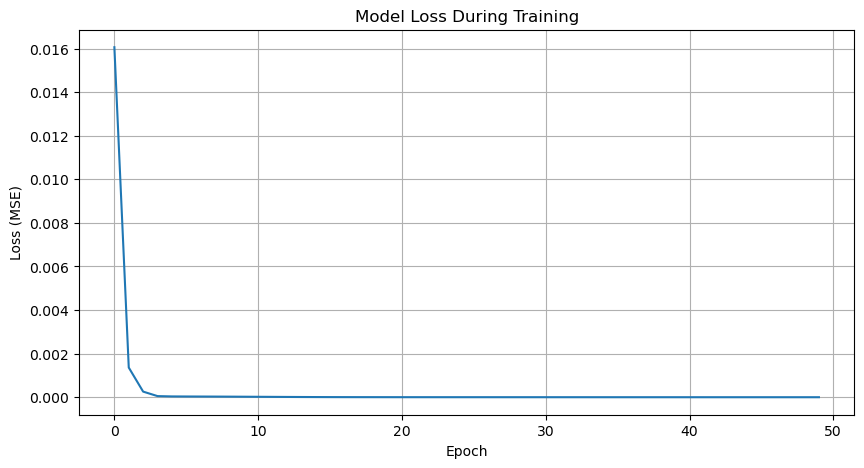

In [116]:
# Plot training loss over epochs
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'])
plt.title('Model Loss During Training')
plt.ylabel('Loss (MSE)')
plt.xlabel('Epoch')
plt.grid(True)
plt.show()

In [117]:
n_test_samples = 100
X_test, y_test = generate_data(n_test_samples, n_digits + 1)  # 4-digit numbers
X_test_normalized, y_test_normalized = normalize_data(X_test, y_test, max_val * 10)

Testing with 4-digit numbers: This generates test data with 4-digit numbers (instead of the 3-digit numbers used for training) to test if the model can generalize.

Normalization: The 4-digit numbers and their sums are normalized, with max_val adjusted for the larger numbers.


In [118]:
predictions = model.predict(X_test_normalized)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


model.predict: The trained model predicts the sum for each pair of 4-digit numbers. These predictions are in the normalized form (between 0 and 1).

In [119]:
predictions_denormalized = predictions * (max_val * 10)
y_test_denormalized = y_test

Denormalizing: Converts the normalized predictions back to the original scale (i.e., the actual sum of the numbers). The max_val * 10 is used because we're testing on 4-digit numbers.

In [120]:
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

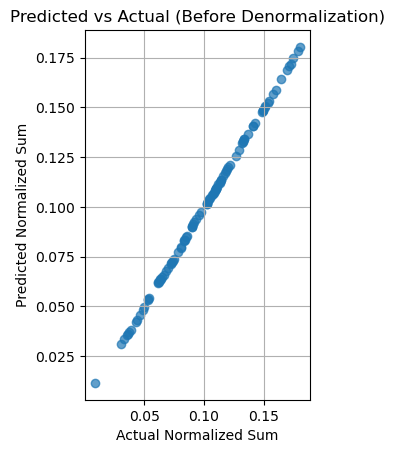

In [121]:
plt.subplot(1, 2, 1)
plt.scatter(y_test_normalized, predictions, alpha=0.7)
plt.title('Predicted vs Actual (Before Denormalization)')
plt.xlabel('Actual Normalized Sum')
plt.ylabel('Predicted Normalized Sum')
plt.grid(True)

Training Loss Plot: Plots the loss (mean squared error) over the training epochs. This helps visualize how well the model is learning.

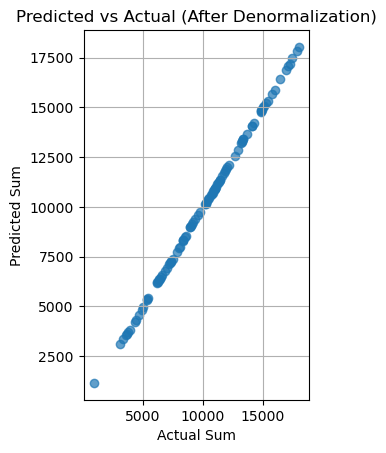

In [122]:
# After denormalization
plt.subplot(1, 2, 2)
plt.scatter(y_test_denormalized, predictions_denormalized, alpha=0.7)
plt.title('Predicted vs Actual (After Denormalization)')
plt.xlabel('Actual Sum')
plt.ylabel('Predicted Sum')
plt.grid(True)

Before Denormalization Plot: Scatter plot comparing the predicted vs actual normalized sums.
After Denormalization Plot: Scatter plot comparing the predicted vs actual denormalized sums.

In [123]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [124]:
for i in range(5):
    print(f"Input numbers: {X_test[i]}, Predicted sum: {predictions_denormalized[i][0]:.2f}, Actual sum: {y_test_denormalized[i]}")

Input numbers: [2658 3547], Predicted sum: 6238.60, Actual sum: 6205
Input numbers: [4247 3784], Predicted sum: 7948.01, Actual sum: 8031
Input numbers: [7524 9961], Predicted sum: 17456.12, Actual sum: 17485
Input numbers: [8846 6104], Predicted sum: 14851.34, Actual sum: 14950
Input numbers: [6874 9602], Predicted sum: 16403.30, Actual sum: 16476


Sample Results: Displays the input numbers, the predicted sum, and the actual sum for 5 test cases. This provides a quick view of how well the model is performing on specific examples.


Goal:
Train a dense neural network to add two numbers with up to 3 digits.
During inference, provide two numbers with 4 digits (which the network has never seen) and test whether the network can predict their sum.
Analyze if the network can generalize the task of addition, even though it has been trained on 3-digit numbers only.

Can the Network Predict 4-digit Numbers Correctly?

No, the network is unlikely to predict the sum of 4-digit numbers accurately.

Why not?:

**Lack of Explicit Rule Learning**: The neural network does not learn the actual rules of addition (like carrying over) as we do in school. Instead, it learns patterns in the data. Since the network has only seen numbers up to 999 during training, it hasn't learned how to handle sums of larger numbers like 4-digit ones (e.g., 2345 + 5678).

**Extrapolation Issue:** Neural networks typically struggle with extrapolation—that is, making predictions outside the range of their training data. A model trained only on 3-digit numbers may learn to predict within that range but will fail when faced with larger numbers because the relationship between input and output might differ for larger numbers.

**Generalization in Arithmetic:** Addition is a highly structured and rule-based operation. Dense networks are good at learning continuous patterns but aren't as effective at learning the step-by-step, discrete operations like "carrying over" that are required for multi-digit addition.

**Example Scenario:**
If the network was trained on numbers like 123 + 456, it will predict well for numbers in the same range.

When you give it numbers like 1234 + 5678 (4-digit numbers), the network will struggle because it hasn't learned the rule of carrying digits or how the magnitude of numbers increases with each additional digit. Its weights are tuned to handle inputs within the range of 3-digit numbers.


# Conclusion

## Why Neural Networks Struggle in This Case

Neural networks, particularly dense networks, don't learn abstract rules like we do in school. They rely on statistical patterns in the data. Arithmetic, specifically addition, involves strict rules such as place-value operations and carrying, which the network does not explicitly learn unless explicitly programmed or trained using different strategies (e.g., recurrent networks, digit-by-digit learning).

### Why Neural Networks Struggle with Extrapolation: Lack of Rule Learning

Neural networks learn statistical patterns rather than explicit arithmetic rules. When presented with numbers beyond their training scope (e.g., 4-digit numbers), they may fail to apply the addition rules they weren't explicitly trained to understand.

### Extrapolation Issues

Extrapolation—predicting values outside the training range—is challenging for neural networks. They can interpolate well within the ranges seen during training but often perform poorly outside those ranges. For example, a model trained on 3-digit numbers lacks the capacity to handle the carrying over that is necessary for adding 4-digit numbers.

### Generalization in Arithmetic

Addition is a structured operation requiring an understanding of place value and carrying. Dense networks are not designed for this kind of discrete reasoning.

### Human Learning vs. Neural Networks

In school, we learn to add numbers of any size using the rules of addition (carry over, place value, etc.). Dense neural networks, on the other hand, can approximate these operations within a limited scope (e.g., 3-digit numbers), but they are not designed to generalize these rules beyond the range they were trained on.

# **Final Answer:**

The code does not fulfill the ability to add numbers with an extra digit correctly. It demonstrates a common limitation of neural networks, especially for tasks like arithmetic, which require precise rule-based logic rather than pattern recognition.


# Part 3

# Difference Between Dense Networks and Recurrent Networks:

In a dense network (also known as a fully connected network), every neuron in one layer is connected to every neuron in the next layer. These networks process the input data in one step, without considering any relationship or dependency between sequential inputs. Dense networks are suitable for tasks where the input features are independent of each other, such as image classification or regression tasks.


On the other hand, recurrent networks (RNNs) are specifically designed to handle sequential data, where the order of the input matters. In an RNN, each neuron not only receives the current input but also information from the previous steps (i.e., it "remembers" past inputs). This makes RNNs ideal for tasks like time series prediction, language modeling, or any task where past inputs influence future outputs. Unlike dense networks, recurrent networks maintain an internal state that gets updated over time, allowing them to process data with temporal or sequential dependencies.


The key difference lies in their handling of sequential information: dense networks process inputs independently, while recurrent networks can capture patterns in sequences by considering the relationships between inputs across time steps.